In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [6]:
df.shape

(1340, 10)

In [12]:
sns.set(style="whitegrid", palette="Set2" ,font_scale=1.2)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()


Id               0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [10]:
df.dropna(inplace = True)

In [11]:
df.shape

(1332, 10)

In [13]:
df.isna().sum()

Id               0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [14]:
pd.set_option("display.float_format","{:.2f}".format)

In [15]:
df.describe(include='all')

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


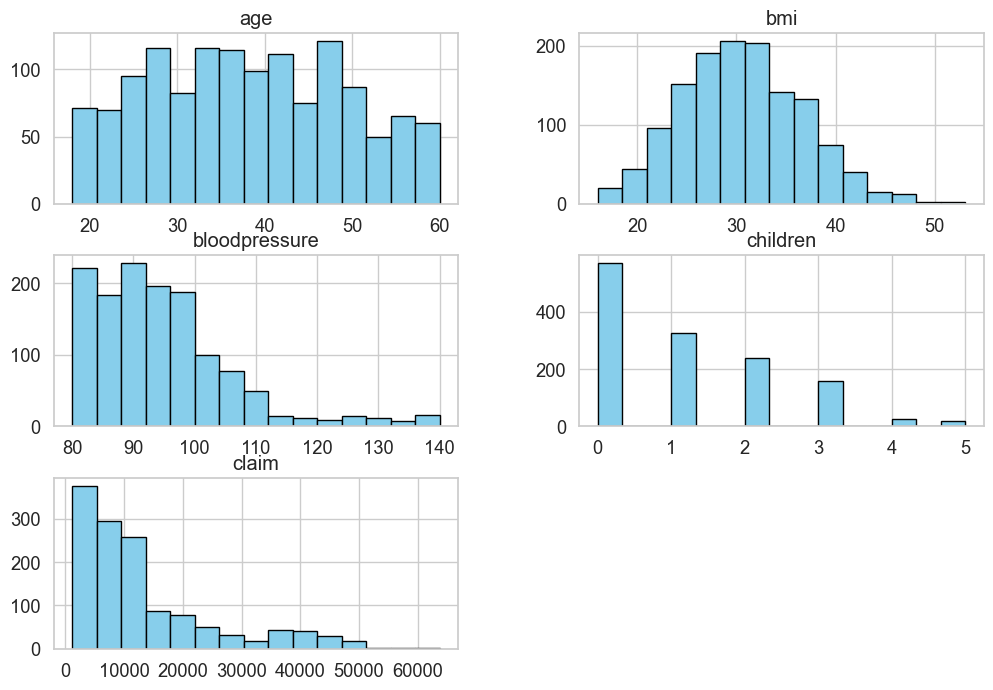

In [16]:
numerical_cols = ['age' , 'bmi' , 'bloodpressure','children' , 'claim']
df[numerical_cols].hist(bins=15, figsize=(12, 8),color="skyblue",edgecolor='black') 
plt.title('Numerical Features Distribution', fontsize=16)
plt.show()

In [16]:
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
7,8,19.00,male,41.10,100,No,0,No,northwest,1146.80
8,9,20.00,male,43.00,86,No,0,No,northwest,1149.40
9,10,30.00,male,53.10,97,No,0,No,northwest,1163.46


C:\Users\gawra\AppData\Local\Temp\ipykernel_25692\1872230270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\gawra\AppData\Local\Temp\ipykernel_25692\1872230270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\gawra\AppData\Local\Temp\ipykernel_25692\1872230270.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")
C:\Users\gawra\AppData\Local\Temp\ipykernel_25692\1872230270.py:6: FutureWarning: 

Passing `palette` with

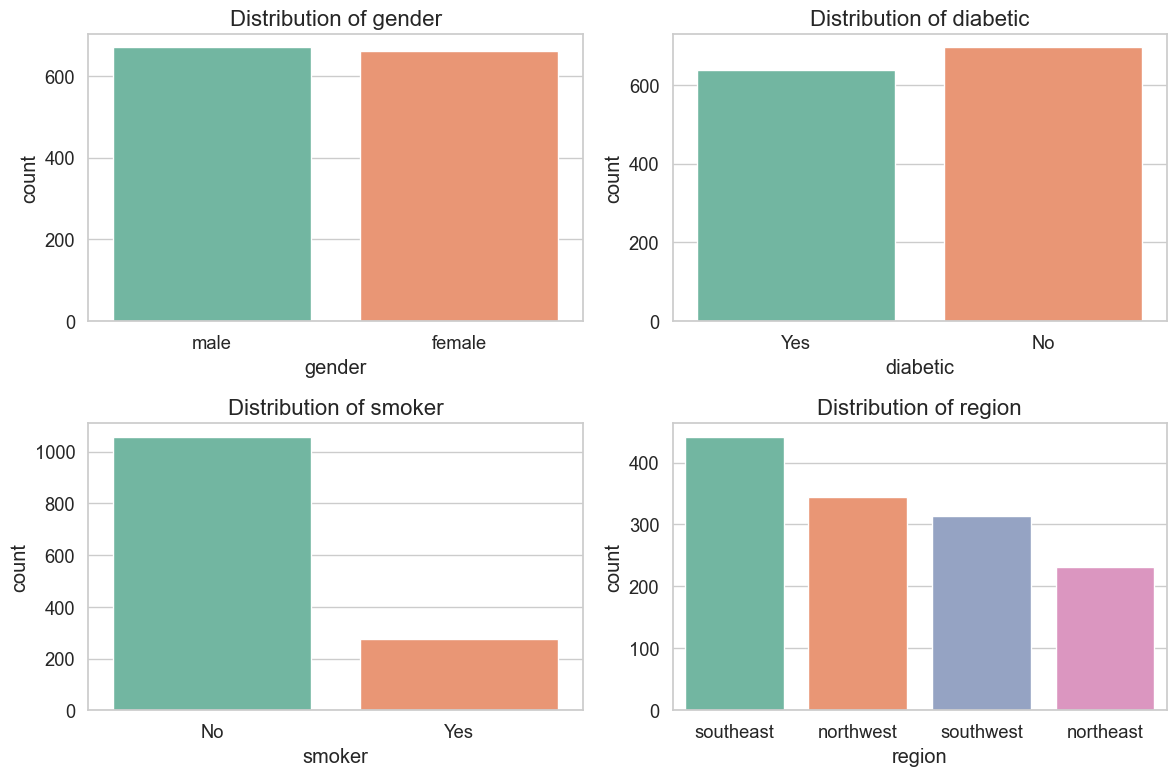

In [17]:
categorical_cols = ['gender','diabetic','smoker','region']
plt.figure(figsize=(12,8))

for i , col in enumerate(categorical_cols):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.tight_layout()

In [18]:
df.groupby(['gender','smoker'])['claim'].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

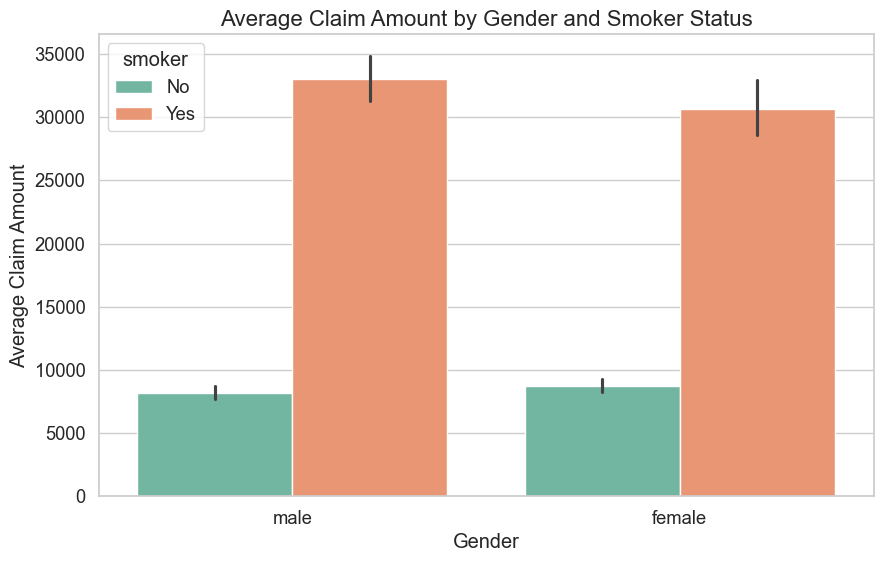

In [19]:
## Claim distribution by gender and smoker status
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='gender', y='claim', hue='smoker', palette="Set2")
plt.title('Average Claim Amount by Gender and Smoker Status', fontsize=16)
plt.ylabel('Average Claim Amount')          
plt.xlabel('Gender')
plt.show()  

In [20]:
pivot_diabetic_region = df.groupby(['region','diabetic'])['claim'].mean().unstack()

In [21]:
pivot_diabetic_region

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


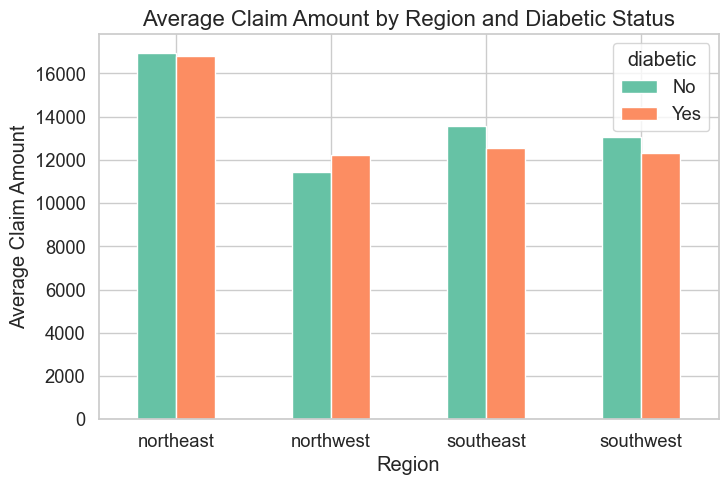

In [22]:
pivot_diabetic_region.plot(kind='bar', figsize=(8,5))
plt.title('Average Claim Amount by Region and Diabetic Status', fontsize=16)
plt.ylabel('Average Claim Amount')  
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.show()

In [23]:
pivot_table = pd.pivot_table(df, values='claim', index='region', columns='smoker', aggfunc='mean').round(2)
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [24]:
pivot_table = pd.pivot_table(df, values='claim', index='children', columns='diabetic', aggfunc='mean').round(2)
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [25]:
df[numerical_cols].corr()  

,age,bmi,bloodpressure,children,claim
age,1.00,-0.04,-0.06,-0.03,-0.03
bmi,-0.04,1.00,0.14,0.01,0.20
bloodpressure,-0.06,0.14,1.00,-0.03,0.53
children,-0.03,0.01,-0.03,1.00,0.06
claim,-0.03,0.20,0.53,0.06,1.00


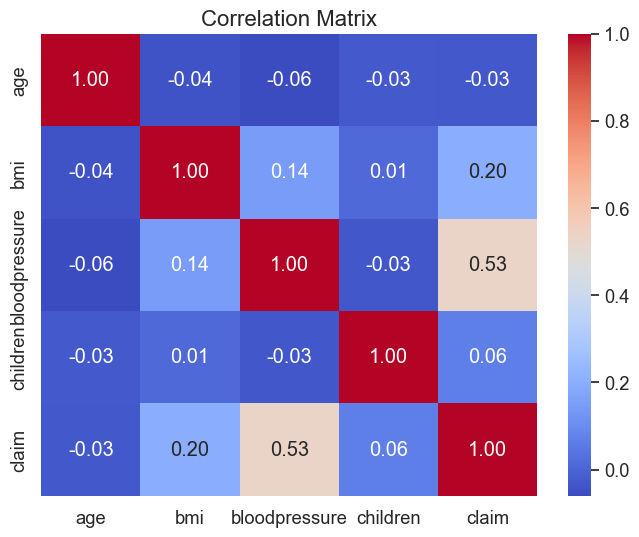

In [26]:
##Heat map
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

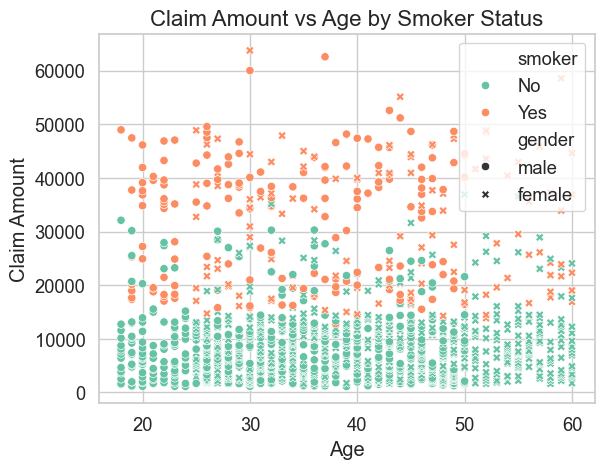

In [27]:
sns.scatterplot(data=df, x='age', y='claim', hue='smoker', palette="Set2",style='gender')
plt.title('Claim Amount vs Age by Smoker Status', fontsize=16)
plt.ylabel('Claim Amount')
plt.xlabel('Age')
plt.show()

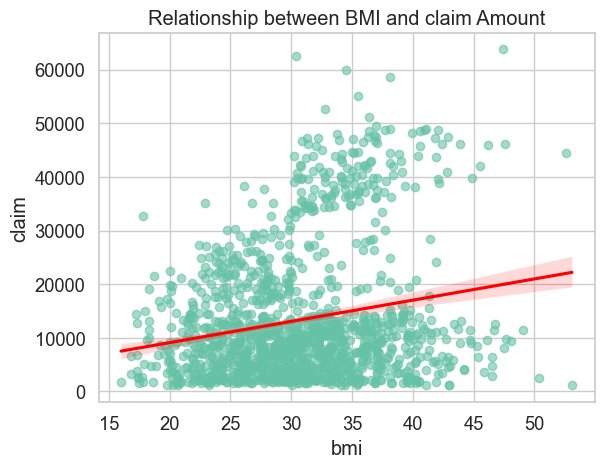

In [28]:
sns.regplot(data=df, x='bmi', y='claim', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relationship between BMI and claim Amount')
plt.show()

C:\Users\gawra\AppData\Local\Temp\ipykernel_25692\3743328046.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='children', y='claim', palette="Set2")


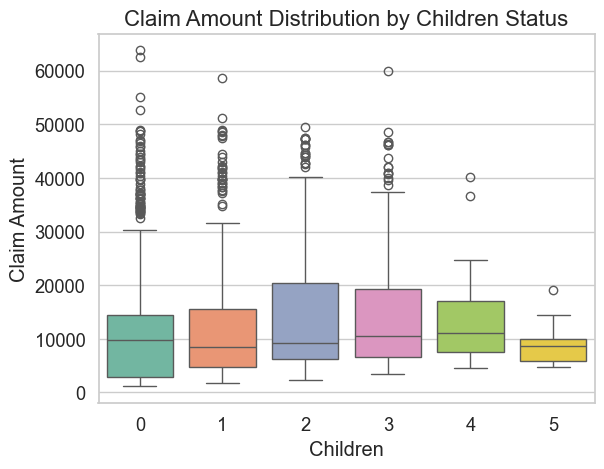

In [29]:
sns.boxplot(data=df, x='children', y='claim', palette="Set2")
plt.title('Claim Amount Distribution by Children Status', fontsize=16)
plt.ylabel('Claim Amount')
plt.xlabel('Children')
plt.show()

In [31]:
df['age_group'] = pd.cut(df['age'], bins=[0,18, 30, 45, 60, 80], labels=['<18','18-29', '30-44', '45-60', '60+'])

In [32]:
df['age_group'].value_counts()

age_group
30-44    553
45-60    383
18-29    380
<18       16
60+        0
Name: count, dtype: int64

C:\Users\gawra\AppData\Local\Temp\ipykernel_25692\969796965.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'age_group', y = 'claim',estimator='mean',errorbar='sd', palette="Set2")


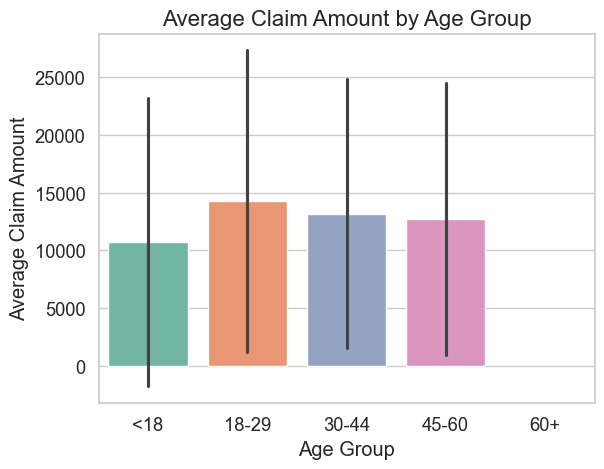

In [34]:
sns.barplot(data = df, x = 'age_group', y = 'claim',estimator='mean',errorbar='sd', palette="Set2")
plt.title('Average Claim Amount by Age Group', fontsize=16)
plt.ylabel('Average Claim Amount')
plt.xlabel('Age Group')
plt.show()


In [35]:
df['bmi_category'] = pd.cut(df['bmi'], bins=[0,18.5, 24.9, 29.9, 100], labels=['Underweight','Normal weight', 'Overweight', 'Obesity'])

In [36]:
df['bmi_category'].value_counts()

bmi_category
Obesity          702
Overweight       387
Normal weight    222
Underweight       21
Name: count, dtype: int64

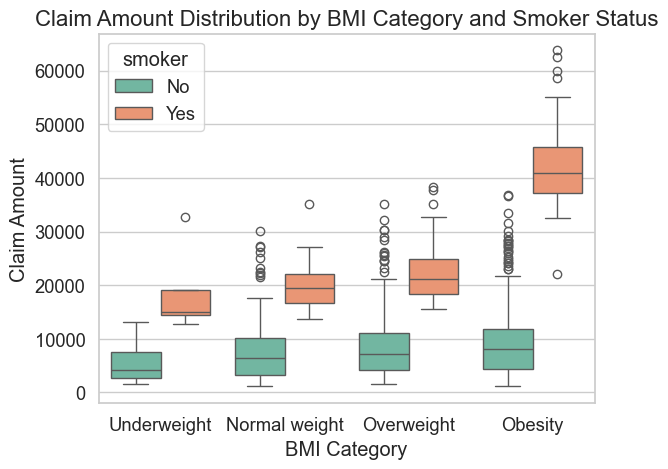

In [37]:
sns.boxplot(data=df,x='bmi_category', y='claim',hue='smoker', palette="Set2")
plt.title('Claim Amount Distribution by BMI Category and Smoker Status', fontsize=16)
plt.ylabel('Claim Amount')
plt.xlabel('BMI Category')
plt.show()

In [38]:
import warnings 
warnings.filterwarnings('ignore')

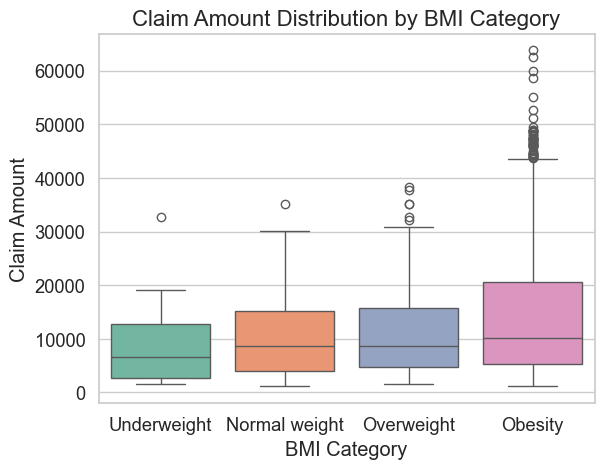

In [39]:
sns.boxplot(data=df,x='bmi_category', y='claim', palette="Set2")
plt.title('Claim Amount Distribution by BMI Category', fontsize=16)
plt.ylabel('Claim Amount')
plt.xlabel('BMI Category')
plt.show()

In [40]:
region_stats = df.groupby("region").agg(
    smoker_rate = ("smoker", lambda x: (x=='Yes').mean() * 100),
    mean_claim = ("claim", "mean")   
).reset_index()

In [41]:
region_stats 


,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


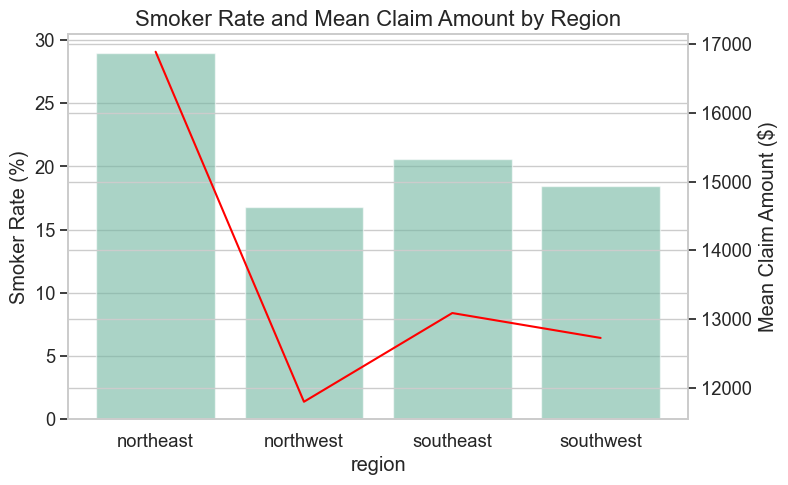

In [42]:
fig , ax1 = plt.subplots(figsize=(8,5))
sns.barplot(data=region_stats, x='region', y='smoker_rate', ax=ax1,alpha=0.6)
ax2 = ax1.twinx()
sns.lineplot(data=region_stats, x='region', y='mean_claim', ax=ax2, color='red',markers='o')

ax1.set_ylabel('Smoker Rate (%)')
ax2.set_ylabel('Mean Claim Amount ($)')
plt.title('Smoker Rate and Mean Claim Amount by Region', fontsize=16)
plt.show()


Data Preprocessing

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib

In [44]:
df.columns
X = df[['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children','smoker']]
y = df['claim']

In [45]:
cat_cols = ['gender','diabetic','smoker']

label_encoders = {}

In [46]:
from sklearn.preprocessing import LabelEncoder
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le, f'label_encoder_{col}.pkl')

In [47]:
X

,age,gender,bmi,bloodpressure,diabetic,children,smoker
0,39.00,1,23.20,91,1,0,0
1,24.00,1,30.10,87,0,0,0
7,19.00,1,41.10,100,0,0,0
8,20.00,1,43.00,86,0,0,0
9,30.00,1,53.10,97,0,0,0
...,...,...,...,...,...,...,...
1335,44.00,0,35.50,88,1,0,1
1336,59.00,0,38.10,120,0,1,1
1337,30.00,1,34.50,91,1,3,1
1338,37.00,1,30.40,106,0,0,1


In [48]:
label_encoders

{'gender': LabelEncoder(),
 'diabetic': LabelEncoder(),
 'smoker': LabelEncoder()}

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
num_cols = ['age', 'bmi', 'bloodpressure', 'children']
scaler = StandardScaler()

In [51]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])   

In [56]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [52]:
print(X_train.shape,y_train.shape)

(1065, 7) (1065,)


In [53]:
print(X_test.shape,y_test.shape)

(267, 7) (267,)


In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [55]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return {"R2": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

In [56]:
results = {}

In [57]:
lr = LinearRegression()
lr.fit(X_train, y_train)
results['Linear Regression'] = evaluate_model(lr,  X_train, X_test, y_train, y_test)
print("Linear Regression model trained")

best_poly_model = None
best_poly_score = -np.inf   

for degree in (2, 3):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly, y_train)
    score = poly_lr.score(X_test_poly, y_test)
    if score > best_poly_score:
        best_poly_score = score
        best_poly_model = (degree,poly, poly_lr)
degree,poly, poly_lr = best_poly_model

results['Polynomial Regression (deg = {degree})'] = evaluate_model(poly_lr, poly.fit_transform(X_train), poly.transform(X_test), y_train, y_test)
print("Polynomial Regression models trained")     

rf = RandomForestRegressor()

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, scoring='r2', verbose=0)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

results['Random Forest'] = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
print("Random Forest training is completed  best parameters:", rf_grid.best_params_)

svr = SVR()
svr_params = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 50],
    'epsilon': [0.1, 0.2, 0.5],
    'degree': [2, 3]
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, n_jobs=-1, scoring='r2', verbose=0)
svr_grid.fit(X_train, y_train)
best_svr = svr_grid.best_estimator_
results['SVR'] = evaluate_model(best_svr, X_train, X_test, y_train, y_test)

print("SVR training is completed  best parameters:", svr_grid.best_params_)


xbg = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.5, 0.1],
    'subsample': [0.8, 1.0],
}
xgb_grid = GridSearchCV(xbg, xgb_params, cv=3, n_jobs=-1, scoring='r2', verbose=0)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
results['XGBoost'] = evaluate_model(best_xgb, X_train, X_test, y_train, y_test)

print("XGBoost training is completed  best parameters:", xgb_grid.best_params_)


Linear Regression model trained
Polynomial Regression models trained
Random Forest training is completed  best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
SVR training is completed  best parameters: {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
XGBoost training is completed  best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [58]:
results

{'Linear Regression': {'R2': 0.7186402865210723,
  'MAE': 5034.263198897409,
  'MSE': 40553181.35803283,
  'RMSE': 6368.137982018985},
 'Polynomial Regression (deg = {degree})': {'R2': 0.7757814325424963,
  'MAE': 4426.3218151787405,
  'MSE': 32317264.321579807,
  'RMSE': 5684.827554251739},
 'Random Forest': {'R2': 0.8198983934739511,
  'MAE': 3884.54986457329,
  'MSE': 25958560.38526616,
  'RMSE': 5094.954404630738},
 'SVR': {'R2': 0.4979929465562679,
  'MAE': 5916.907409876852,
  'MSE': 72355714.43258542,
  'RMSE': 8506.21622300923},
 'XGBoost': {'R2': 0.8270382329943683,
  'MAE': 3897.0650265902973,
  'MSE': 24929474.86567057,
  'RMSE': 4992.9425057445405}}

In [59]:
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
results_df

,R2,MAE,MSE,RMSE
XGBoost,0.83,3897.07,24929474.87,4992.94
Random Forest,0.82,3884.55,25958560.39,5094.95
Polynomial Regression (deg = {degree}),0.78,4426.32,32317264.32,5684.83
Linear Regression,0.72,5034.26,40553181.36,6368.14
SVR,0.50,5916.91,72355714.43,8506.22


In [60]:
best_rf

,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
models = {
    'Linear Regression': lr,
    'Polynomial Regression': poly_lr,
    'Random Forest': best_rf,
    'SVR': best_svr,
    'XGBoost': best_xgb
}

In [64]:
best_r2 = results_df['R2'].max()

In [65]:
best_r2

0.8270382329943683

In [66]:
top_model = results_df[results_df["R2"] == best_r2]

In [67]:
top_model

,R2,MAE,MSE,RMSE
XGBoost,0.83,3897.07,24929474.87,4992.94


In [70]:
best_model = models[top_model.index[0]]

In [71]:
best_model 

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [72]:
joblib.dump(best_model, 'best_model.pkl')
print(f"best model selected is {top_model.index[0]}")

best model selected is XGBoost
